# Machine Learning Project 2

## Player Performance Assessment

#### Objective
The main goal of the problem is to develop a machine learning algorithm that predicts the scout-made evaluation of players in the context of given matches.

#### About Dataset
You are provided the Sevilla FC and FC Bengaluru United large scouting dataset containing the players, teams, and opponent's performance in terms of physical, kinematical, technical, and tactical variables.
Every row of the dataset corresponds to the evaluation of a player in a given match together with variables related to the player, match, team, and opponent and the rating of a player in a match given by a scout.
 
#### Dataset Description
You are provided with 2 files: train.csv and test.csv. 
 
Train and Test set
train.csv and test.csv contain the variables relating to player, match, team, and opponent. The training set includes the target variable rating_num indicating the rating of a player in a match. You need to predict the rating_num in the test set.

#### Variable | Description
- row_id | Unique identifier of a row
- scout_id (categorical) | Unique identifier of a scout
- winner (categorical) | Player’s team result: winner, loser, or draw
- team (categorical) | Team of the player: Team1 or Team2 
- team1_system_id (categorical) | Unique Id of Team 1
- team2_system_id (categorical) | Unique Id of Team 2
- competitionId (categorical) | Competition id of the match
- player_position_1 (categorical) | Position 1 of a player in a match
- player_position_2 (categorical) | Position 2 of a player in a match
- player_height | Transformed height of a player
- player_weight | Transformed weight of a player
- Player Encoded Variables | Pre encoded variables of a player related to offensive, defensive, positional, physical, general, and other
- Team 1 Encoded Variables  | Pre encoded variables of Team 1 related to offensive, defensive and other 
- Team 2 Encoded Variables  | Pre encoded variables of Team 2 related to offensive, defensive and other 
- rating_num | Rating of a player in a match given by a scout

##### Variables that encode player properties or performance are grouped according to the following scheme:  
player_(offensive/defensive/positional/physical/general/other)_(derived/raw/ratio)_var_#number

player shows if the variable refers to a player property
(offensive/defensive/positional/physical/general/other) refers to the nature of the variable
(derived/raw/ratio):
raw: variable empirically measured
derived: variable defined based on two or more variables and not empirically measured
ratio: variable defined as a ratio of two raw variables


 
##### Variables that encode team properties or performance are grouped according to the following scheme:  
team(1/2)_(offensive/defensive/other)_(derived/raw/ratio)_var_#number

team(1/2) shows if the variable refers to a team1 or team2 property
(offensive/defensive/other) refers to the nature of the variable
(derived/raw/ratio):
raw: variable empirically measured
derived: variable defined based on two or more variables and not empirically measured
ratio: variable defined as a ratio of two raw variables


### Data Collection and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
train.head(10)

row_id  scout_id  rating_num  winner   team  competitionId  \
0       1        13         7.0  winner  team1              8   
1       3        16         6.5   loser  team2              8   
2       4         4         8.5   loser  team1              5   
3       5        13         8.0   loser  team2              4   
4       7        11         3.5    draw  team1              5   
5       8        11         3.5    draw  team1              5   
6       9        15         7.0  winner  team2              7   
7      10         4         7.5   loser  team1              7   
8      11        16         7.5  winner  team1              7   
9      12         3         6.5    draw  team2              5   

   player_position_1  player_position_2  player_height  player_weight  \
0                7.0                7.0       0.317073           0.48   
1                3.0                9.0       0.463415           0.42   
2               11.0               11.0       0.682927           0.44   
3               17.0               17.0       0.682927           0.58   
4               10.0               10.0       0.731707           0.70   
5               10.0               10.0       0.731707           0.70   
6               10.0               10.0       0.609756           0.46   
7                3.0                9.0       0.243902           0.34   
8                8.0                8.0       0.390244           0.22   
9                3.0                3.0       0.609756           0.58   

   player_general_var_0  player_general_var_1  player_general_var_2  \
0                   0.0                     0                   0.0   
1                   0.0                     0                   0.0   
2                   0.0                     0                   0.0   
3                   0.0                     0                   0.0   
4                   0.0                     0                   0.0   
5                   0.0                     0                   0.0   
6                   0.0                     0                   0.0   
7                   0.0                     0                   0.0   
8                   0.0                     0                   0.0   
9                   0.0                     0                   0.0   

   player_general_var_3  player_general_var_4  player_general_var_5  \
0                   0.0              0.114754                  0.00   
1                   0.0              0.081967                  0.00   
2                   0.0              0.065574                  0.25   
3                   0.0              0.000000                  0.00   
4                   0.0              0.262295                  0.25   
5                   0.0              0.262295                  0.25   
6                   0.0              0.032787                  0.00   
7                   0.0              0.221311                  0.00   
8                   0.0              0.114754                  0.00   
9                   0.0              0.057377                  0.00   

   player_positional_raw_var_0  player_positional_raw_var_1  \
0                     0.000000                          0.0   
1                     0.000000                          0.0   
2                     0.000000                          0.0   
3                     0.000000                          0.0   
4                     0.000000                          0.0   
5                     0.000000                          0.0   
6                     0.000000                          0.0   
7                     0.000000                          0.0   
8                     0.000000                          0.0   
9                     0.166667                          0.0   

   player_positional_raw_var_2  player_positional_raw_var_3  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0      

In [6]:
train.shape

(20453, 800)

In [7]:
train.isnull().sum()

row_id                                   0
scout_id                                 0
rating_num                               0
winner                                   0
team                                     0
competitionId                            0
player_position_1                       75
player_position_2                       75
player_height                            2
player_weight                            2
player_general_var_0                     0
player_general_var_1                     0
player_general_var_2                     0
player_general_var_3                     0
player_general_var_4                     0
player_general_var_5                     0
player_positional_raw_var_0            384
player_positional_raw_var_1            384
player_positional_raw_var_2            384
player_positional_raw_var_3            384
player_defensive_raw_var_4             384
player_defensive_raw_var_5             384
player_other_raw_var_6                 259
player_offe

In [8]:
#dropping all the completely empty columns
train.dropna(how = 'all', axis =1, inplace = True)

In [9]:
train.shape

(20453, 774)

In [10]:
train.isna().sum()

row_id                                   0
scout_id                                 0
rating_num                               0
winner                                   0
team                                     0
competitionId                            0
player_position_1                       75
player_position_2                       75
player_height                            2
player_weight                            2
player_general_var_0                     0
player_general_var_1                     0
player_general_var_2                     0
player_general_var_3                     0
player_general_var_4                     0
player_general_var_5                     0
player_positional_raw_var_0            384
player_positional_raw_var_1            384
player_positional_raw_var_2            384
player_positional_raw_var_3            384
player_defensive_raw_var_4             384
player_defensive_raw_var_5             384
player_other_raw_var_6                 259
player_offe

In [11]:
#dropping columns having more than 10% empty values
train.dropna(thresh = train.shape[0]*0.9,how = 'all', axis=1, inplace = True)

In [12]:
train.shape

(20453, 654)

In [13]:
train.isnull().sum()

row_id                                  0
scout_id                                0
rating_num                              0
winner                                  0
team                                    0
competitionId                           0
player_position_1                      75
player_position_2                      75
player_height                           2
player_weight                           2
player_general_var_0                    0
player_general_var_1                    0
player_general_var_2                    0
player_general_var_3                    0
player_general_var_4                    0
player_general_var_5                    0
player_positional_raw_var_0           384
player_positional_raw_var_1           384
player_positional_raw_var_2           384
player_positional_raw_var_3           384
player_defensive_raw_var_4            384
player_defensive_raw_var_5            384
player_other_raw_var_6                259
player_offensive_raw_var_7        

### Encoding for categorical string data

In [14]:
train['team'].value_counts()     #----> 2 nominal categories, hence performing one hot encoding

team1    10306
team2    10147
Name: team, dtype: int64

#### Dummy Encoding for nominal type data

In [15]:
train.head()

row_id  scout_id  rating_num  winner   team  competitionId  \
0       1        13         7.0  winner  team1              8   
1       3        16         6.5   loser  team2              8   
2       4         4         8.5   loser  team1              5   
3       5        13         8.0   loser  team2              4   
4       7        11         3.5    draw  team1              5   

   player_position_1  player_position_2  player_height  player_weight  \
0                7.0                7.0       0.317073           0.48   
1                3.0                9.0       0.463415           0.42   
2               11.0               11.0       0.682927           0.44   
3               17.0               17.0       0.682927           0.58   
4               10.0               10.0       0.731707           0.70   

   player_general_var_0  player_general_var_1  player_general_var_2  \
0                   0.0                     0                   0.0   
1                   0.0                     0                   0.0   
2                   0.0                     0                   0.0   
3                   0.0                     0                   0.0   
4                   0.0                     0                   0.0   

   player_general_var_3  player_general_var_4  player_general_var_5  \
0                   0.0              0.114754                  0.00   
1                   0.0              0.081967                  0.00   
2                   0.0              0.065574                  0.25   
3                   0.0              0.000000                  0.00   
4                   0.0              0.262295                  0.25   

   player_positional_raw_var_0  player_positional_raw_var_1  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_2  player_positional_raw_var_3  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_defensive_raw_var_4  player_defensive_raw_var_5  \
0                      0.0000                         0.0   
1                      0.0625                         0.0   
2                      0.1875                         0.0   
3                      0.0000                         0.0   
4                      0.0000                         0.0   

   player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  \
0                0.467550                         0.0                     0.0   
1                0.436467                         0.0                     0.0   
2                0.631370                         0.0                     0.0   
3                0.467550                         0.0                     0.0   
4                0.467550                         0.4                     0.0   

   player_other_raw_var_9  player_other_raw_var_10  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   

   player_offensive_raw_var_11  player_other_raw_var_12  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   

   player_other_raw_var_13 

In [16]:
train['team2'] = pd.get_dummies(train['team'], drop_first = True)

In [17]:
train.drop(['team'], inplace = True, axis =1)    #----> dropping original column after encoding

In [18]:
train.head()

row_id  scout_id  rating_num  winner  competitionId  player_position_1  \
0       1        13         7.0  winner              8                7.0   
1       3        16         6.5   loser              8                3.0   
2       4         4         8.5   loser              5               11.0   
3       5        13         8.0   loser              4               17.0   
4       7        11         3.5    draw              5               10.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                7.0       0.317073           0.48                   0.0   
1                9.0       0.463415           0.42                   0.0   
2               11.0       0.682927           0.44                   0.0   
3               17.0       0.682927           0.58                   0.0   
4               10.0       0.731707           0.70                   0.0   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                     0                   0.0                   0.0   
1                     0                   0.0                   0.0   
2                     0                   0.0                   0.0   
3                     0                   0.0                   0.0   
4                     0                   0.0                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                          0.0   
1              0.081967                  0.00                          0.0   
2              0.065574                  0.25                          0.0   
3              0.000000                  0.00                          0.0   
4              0.262295                  0.25                          0.0   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.0                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.4                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2         

#### Label Encoding for ordinal type

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()
train['win_status'] = encoder.fit_transform(train['winner'])

In [21]:
train['win_status'].value_counts()

2    8735
1    6442
0    5276
Name: win_status, dtype: int64

In [22]:
train.drop('winner', inplace = True, axis = 1)   #---->Dropping original

In [23]:
train.head()

row_id  scout_id  rating_num  competitionId  player_position_1  \
0       1        13         7.0              8                7.0   
1       3        16         6.5              8                3.0   
2       4         4         8.5              5               11.0   
3       5        13         8.0              4               17.0   
4       7        11         3.5              5               10.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                7.0       0.317073           0.48                   0.0   
1                9.0       0.463415           0.42                   0.0   
2               11.0       0.682927           0.44                   0.0   
3               17.0       0.682927           0.58                   0.0   
4               10.0       0.731707           0.70                   0.0   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                     0                   0.0                   0.0   
1                     0                   0.0                   0.0   
2                     0                   0.0                   0.0   
3                     0                   0.0                   0.0   
4                     0                   0.0                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                          0.0   
1              0.081967                  0.00                          0.0   
2              0.065574                  0.25                          0.0   
3              0.000000                  0.00                          0.0   
4              0.262295                  0.25                          0.0   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.0                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.4                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0       

### Missing value treatment  

##### Iterative Imputation for Multivariate data

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(train)

In [26]:
imputed

array([[1.00000000e+00, 1.30000000e+01, 7.00000000e+00, ...,
        2.04924775e-01, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 6.50000000e+00, ...,
        2.95391710e-01, 1.00000000e+00, 1.00000000e+00],
       [4.00000000e+00, 4.00000000e+00, 8.50000000e+00, ...,
        4.37500000e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.92240000e+04, 4.00000000e+00, 5.00000000e+00, ...,
        3.85927114e-01, 0.00000000e+00, 1.00000000e+00],
       [2.92260000e+04, 1.30000000e+01, 6.00000000e+00, ...,
        4.58684576e-01, 0.00000000e+00, 1.00000000e+00],
       [2.92270000e+04, 4.00000000e+00, 6.00000000e+00, ...,
        3.29781678e-01, 1.00000000e+00, 2.00000000e+00]])

In [27]:
train_imputed = pd.DataFrame(imputed, columns = train.columns)

In [28]:
train_imputed.to_csv('train_imputed.csv')

In [29]:
train_imputed.head()

row_id  scout_id  rating_num  competitionId  player_position_1  \
0     1.0      13.0         7.0            8.0                7.0   
1     3.0      16.0         6.5            8.0                3.0   
2     4.0       4.0         8.5            5.0               11.0   
3     5.0      13.0         8.0            4.0               17.0   
4     7.0      11.0         3.5            5.0               10.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                7.0       0.317073           0.48                   0.0   
1                9.0       0.463415           0.42                   0.0   
2               11.0       0.682927           0.44                   0.0   
3               17.0       0.682927           0.58                   0.0   
4               10.0       0.731707           0.70                   0.0   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                          0.0   
1              0.081967                  0.00                          0.0   
2              0.065574                  0.25                          0.0   
3              0.000000                  0.00                          0.0   
4              0.262295                  0.25                          0.0   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.0                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.4                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0       

In [30]:
train_imputed.isna().sum().sum()    #----->No null values

0

### Outlier Treatment

In [31]:
#dropping unnecessary columns
train_imputed.drop(['row_id','scout_id'], inplace = True, axis = 1)

In [32]:
train_imputed.head()

rating_num  competitionId  player_position_1  player_position_2  \
0         7.0            8.0                7.0                7.0   
1         6.5            8.0                3.0                9.0   
2         8.5            5.0               11.0               11.0   
3         8.0            4.0               17.0               17.0   
4         3.5            5.0               10.0               10.0   

   player_height  player_weight  player_general_var_0  player_general_var_1  \
0       0.317073           0.48                   0.0                   0.0   
1       0.463415           0.42                   0.0                   0.0   
2       0.682927           0.44                   0.0                   0.0   
3       0.682927           0.58                   0.0                   0.0   
4       0.731707           0.70                   0.0                   0.0   

   player_general_var_2  player_general_var_3  player_general_var_4  \
0                   0.0                   0.0              0.114754   
1                   0.0                   0.0              0.081967   
2                   0.0                   0.0              0.065574   
3                   0.0                   0.0              0.000000   
4                   0.0                   0.0              0.262295   

   player_general_var_5  player_positional_raw_var_0  \
0                  0.00                          0.0   
1                  0.00                          0.0   
2                  0.25                          0.0   
3                  0.00                          0.0   
4                  0.25                          0.0   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.0                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.4                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4     

In [33]:
num_list = [col for col in train_imputed.columns if (train_imputed[col].dtype == 'int64') or (train_imputed[col].dtype == 'float64')]

In [34]:
for feature in train_imputed[num_list].columns[4:]:
    data = sorted(train_imputed[feature])
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    # Replace the outlier values with median of column values
    train_imputed.loc[(train_imputed[feature] < lower) | (train_imputed[feature] > upper),feature] = train_imputed[feature].median()

### Model Building

In [35]:
#Splitting features and target 
X = train_imputed.drop('rating_num', axis = 1)
Y = train_imputed['rating_num']

In [36]:
X.shape, Y.shape

((20453, 651), (20453,))

##### Splitting data into train and validation set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_valid,y_train,y_valid = train_test_split(X,Y,test_size=0.3,random_state=2)

### Scaling Data (Standardization)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

In [41]:
x_train_scaled

array([[ 2.86130850e+00,  3.52482829e-02, -4.01519445e-05, ...,
         3.10236628e-03,  1.01130932e+00, -1.45505237e+00],
       [ 2.91309621e-01, -5.14335681e-01, -6.13079715e-01, ...,
        -5.56568604e-01, -9.88817151e-01,  1.01568057e+00],
       [-9.93689817e-01,  6.78421912e-01,  6.15272185e-01, ...,
        -2.00176647e-01, -9.88817151e-01, -1.45505237e+00],
       ...,
       [ 2.91309621e-01,  1.67238657e+00,  1.63889877e+00, ...,
        -2.35464875e-01, -9.88817151e-01, -2.19685900e-01],
       [-1.42202296e+00, -1.11071448e+00, -1.22725566e+00, ...,
         4.09653445e-01,  1.01130932e+00, -1.45505237e+00],
       [ 2.91309621e-01,  1.07600778e+00,  1.02472282e+00, ...,
         2.35243119e-01,  1.01130932e+00, -2.19685900e-01]])

### Linear Regression before PCA

##### Model Training

In [42]:
from sklearn import linear_model

In [43]:
## Creating model instance of linear regression class
model_lr = linear_model.LinearRegression(n_jobs=-1)

## Fit the training data
model_lr.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [44]:
#Predict values on train data
y_train_predict = model_lr.predict(x_train_scaled).round(1)
y_train_predict

array([7.4, 7.1, 6.1, ..., 6.3, 6.6, 6.1])

In [45]:
#Predict values on train data
y_valid_predict = model_lr.predict(x_valid_scaled).round(1)
y_valid_predict

array([7.8, 6.3, 6.8, ..., 7. , 6.3, 6.2])

##### Model Evaluation

In [46]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.metrics import r2_score

In [47]:
r2_train = r2_score(y_train,y_train_predict)
r2_valid = r2_score(y_valid, y_valid_predict)

In [48]:
model_lr.coef_   #---->Weights

array([-1.45685388e-01,  8.91247983e-02, -7.94672491e-02,  2.43539540e-01,
       -1.78589669e-01,  4.38823128e+11,  7.79839940e+10,  3.19303164e+11,
       -1.92722336e+11,  1.44805908e-02,  7.37076318e+10, -1.63036878e+10,
        1.54589111e+10, -4.28905957e+10, -1.23445594e+11, -1.90353394e-03,
        8.17106429e+09,  4.25739288e-02, -6.33694704e+10,  9.98078711e+09,
       -8.38247787e+10,  6.06079514e+09,  4.21173460e+10,  1.45628555e+10,
       -2.45675569e+10, -1.54817178e+10, -3.58905164e+10, -2.03561954e+10,
       -5.76948088e+09,  6.26797278e+09,  1.09547939e+10,  3.48839994e+09,
        9.32012562e+09, -8.08231770e+09, -1.28136211e+10, -7.17213601e+09,
        1.08065946e+10, -4.23448727e+09,  2.72981271e+08, -4.08825261e+08,
        4.04498837e+07, -3.23112140e+09,  2.79388428e-02,  6.91730121e+09,
       -6.65511753e+09, -1.97906494e-02, -2.11486816e-02,  3.89669200e+09,
        8.81397976e+09,  8.67042542e-02,  1.18860825e+10,  3.17514465e+09,
       -1.32732391e-02, -

In [49]:
model_lr.intercept_   #----->Intercept

-2375630882.3639493

In [50]:
print('Linear Regression model before PCA:')
print('Train R2-score:', r2_train)
print('Validation R2-score:',r2_valid)

Linear Regression model before PCA:
Train R2-score: 0.19675384305507204
Validation R2-score: -183.4384088360024


### Feature Extraction - PCA

In [51]:
from sklearn.decomposition import PCA

In [52]:
#Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
pca = PCA().fit(x_train_scaled)

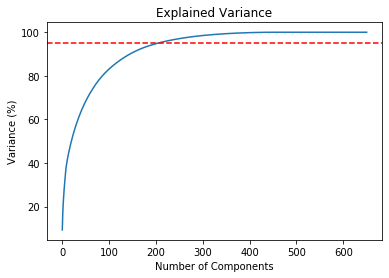

In [53]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

- Required features to explain 95% variance - considering 200 features

In [54]:
# fit on the training data
pca = PCA(200).fit(x_train_scaled)

# transform both training and validation data
x_train_transformed = pca.transform(x_train_scaled)
x_valid_transformed = pca.transform(x_valid_scaled)

In [55]:
pca.components_.shape

(200, 651)

In [56]:
x_train_transformed.shape

(14317, 200)

### Linear Regression after PCA

In [57]:
## Creating model instance of linear regression class
model_lr = linear_model.LinearRegression(n_jobs=-1)

## Fit the training data
model_lr.fit(x_train_transformed,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [58]:
#Predict values on train data
y_train_predict = model_lr.predict(x_train_transformed).round(1)
y_train_predict

array([6.4, 7.4, 6.1, ..., 6.3, 6.8, 6.1])

In [59]:
#Predict values on validation data
y_valid_predict = model_lr.predict(x_valid_transformed).round(1)
y_valid_predict

array([7.6, 6.2, 7.6, ..., 6.9, 6.4, 6. ])

In [60]:
r2_train = r2_score(y_train,y_train_predict)
r2_valid = r2_score(y_valid, y_valid_predict)

In [61]:
print('Linear Regression model after PCA:')
print('Train R2-score:', r2_train)
print('Validation R2-score:',r2_valid)

Linear Regression model after PCA:
Train R2-score: 0.14839884052497943
Validation R2-score: 0.12321025083081494


- Hence it has been observed that the Linear Regression Model Performs better after doing PCA 

### XGBoost Regressor

In [62]:
from xgboost import XGBRegressor

In [63]:
#creating the instance
model_xgb = XGBRegressor()
model_xgb.fit(x_train_transformed,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [64]:
#Predict values on train data
y_train_xgb_predict = model_xgb.predict(x_train_transformed).round(1)
y_train_xgb_predict

array([6.6, 7.7, 6.7, ..., 8.6, 7.1, 6.4], dtype=float32)

In [65]:
#Predict values on validation data
y_valid_xgb_predict = model_xgb.predict(x_valid_transformed).round(1)
y_valid_xgb_predict

array([7.3, 6.4, 7.6, ..., 5.7, 6.1, 5.8], dtype=float32)

In [66]:
r2_train_xgb = r2_score(y_train,y_train_xgb_predict)
r2_valid_xgb = r2_score(y_valid, y_valid_xgb_predict)

In [67]:
print('XGBoost Regressor model after PCA:')
print('Train R2-score:', r2_train_xgb)
print('Validation R2-score:',r2_valid_xgb)

XGBoost Regressor model after PCA:
Train R2-score: 0.8268520551811569
Validation R2-score: 0.0968148362822695


- From the difference of scores of Train and validation, it has been observed that XGBoost is overfitting

## Model Pipeline (Test data)

In [92]:
test = pd.read_csv('test.csv')

In [93]:
test.head()

row_id  scout_id  winner   team  competitionId  player_position_1  \
0   14785        16    draw  team1            7.0                4.0   
1   15125         2    draw  team1            9.0               11.0   
2   13095        16   loser  team2           10.0               19.0   
3    6079        16   loser  team1           11.0                3.0   
4   16584        11  winner  team1            5.0                4.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                4.0       0.317073           0.44                   0.0   
1               11.0       0.560976           0.60                   0.0   
2               19.0       0.195122           0.30                   0.0   
3                9.0       0.341463           0.30                   0.0   
4                4.0       0.585366           0.70                   0.2   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                     0              0.803922                   0.0   
1                     0              0.000000                   0.0   
2                     0              0.000000                   0.0   
3                     0              0.000000                   0.0   
4                     0              0.000000                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                     0.166667   
1              0.229508                  0.00                     0.000000   
2              0.049180                  0.25                     0.000000   
3              0.073770                  0.00                     0.000000   
4              0.106557                  0.00                     0.000000   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0625   
1                          0.0                      0.0625   
2                          0.0                      0.0000   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.287744   
2                         0.0                0.467550   
3                         0.0                0.467550   
4                         0.0                0.359680   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.2                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.0                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0              

In [94]:
test.shape

(8774, 799)

In [95]:
test.isna().sum()

row_id                                  0
scout_id                                0
winner                                  0
team                                    1
competitionId                           1
player_position_1                      75
player_position_2                      75
player_height                          32
player_weight                          37
player_general_var_0                    0
player_general_var_1                    0
player_general_var_2                    0
player_general_var_3                    0
player_general_var_4                    0
player_general_var_5                    0
player_positional_raw_var_0           211
player_positional_raw_var_1           211
player_positional_raw_var_2           211
player_positional_raw_var_3           211
player_defensive_raw_var_4            211
player_defensive_raw_var_5            211
player_other_raw_var_6                218
player_offensive_raw_var_7            211
player_other_raw_var_8            

In [96]:
test.shape

(8774, 799)

##### Encoding

In [97]:
test['team2'] = pd.get_dummies(test['team'], drop_first=True)

In [98]:
test['win_status'] = encoder.fit_transform(test['winner'])

In [99]:
test.head()

row_id  scout_id  winner   team  competitionId  player_position_1  \
0   14785        16    draw  team1            7.0                4.0   
1   15125         2    draw  team1            9.0               11.0   
2   13095        16   loser  team2           10.0               19.0   
3    6079        16   loser  team1           11.0                3.0   
4   16584        11  winner  team1            5.0                4.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                4.0       0.317073           0.44                   0.0   
1               11.0       0.560976           0.60                   0.0   
2               19.0       0.195122           0.30                   0.0   
3                9.0       0.341463           0.30                   0.0   
4                4.0       0.585366           0.70                   0.2   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                     0              0.803922                   0.0   
1                     0              0.000000                   0.0   
2                     0              0.000000                   0.0   
3                     0              0.000000                   0.0   
4                     0              0.000000                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                     0.166667   
1              0.229508                  0.00                     0.000000   
2              0.049180                  0.25                     0.000000   
3              0.073770                  0.00                     0.000000   
4              0.106557                  0.00                     0.000000   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0625   
1                          0.0                      0.0625   
2                          0.0                      0.0000   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.287744   
2                         0.0                0.467550   
3                         0.0                0.467550   
4                         0.0                0.359680   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.2                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.0                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0              

In [106]:
test = pd.DataFrame(data = test, columns = x_train.columns)

In [107]:
test.shape

(8774, 651)

##### Missing value imputation

In [82]:
from sklearn.impute import SimpleImputer

In [109]:
imputer_test = SimpleImputer(strategy='median')
imputed_test = imputer_test.fit_transform(test)

In [110]:
test_imputed = pd.DataFrame(imputed_test, columns = test.columns)

In [111]:
test_imputed.head()

competitionId  player_position_1  player_position_2  player_height  \
0            7.0                4.0                4.0       0.317073   
1            9.0               11.0               11.0       0.560976   
2           10.0               19.0               19.0       0.195122   
3           11.0                3.0                9.0       0.341463   
4            5.0                4.0                4.0       0.585366   

   player_weight  player_general_var_0  player_general_var_1  \
0           0.44                   0.0                   0.0   
1           0.60                   0.0                   0.0   
2           0.30                   0.0                   0.0   
3           0.30                   0.0                   0.0   
4           0.70                   0.2                   0.0   

   player_general_var_2  player_general_var_3  player_general_var_4  \
0              0.803922                   0.0              0.114754   
1              0.000000                   0.0              0.229508   
2              0.000000                   0.0              0.049180   
3              0.000000                   0.0              0.073770   
4              0.000000                   0.0              0.106557   

   player_general_var_5  player_positional_raw_var_0  \
0                  0.00                     0.166667   
1                  0.00                     0.000000   
2                  0.25                     0.000000   
3                  0.00                     0.000000   
4                  0.00                     0.000000   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0625   
1                          0.0                      0.0625   
2                          0.0                      0.0000   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.287744   
2                         0.0                0.467550   
3                         0.0                0.467550   
4                         0.0                0.359680   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.2                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.0                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0  

In [112]:
test_imputed.shape

(8774, 651)

##### Scaling on test

In [113]:
test_scaled = scaler.transform(test_imputed)

##### PCA on test

In [114]:
test_transformed = pca.transform(test_imputed)

##### Target Prediction using Linear Regression

In [122]:
rating_arr = model_lr.predict(test_transformed).round(1)

In [123]:
rating_output = pd.DataFrame(data = rating_arr, columns = ['rating'])

In [124]:
rating_output

rating
0        6.3
1        6.4
2        5.9
3        5.9
4        6.6
5        6.3
6        6.1
7        6.4
8        5.9
9        5.9
10       6.7
11       6.0
12       7.1
13       6.0
14       5.8
15       6.5
16       6.5
17       6.4
18       6.7
19       6.4
20       6.3
21       6.4
22       6.7
23       6.8
24       6.2
25       6.4
26       6.4
27       6.4
28       6.7
29       6.6
30       6.7
31       6.5
32       6.6
33       6.5
34       5.9
35       6.3
36       6.2
37       5.9
38       6.7
39       6.2
40       6.8
41       6.4
42       6.5
43       6.6
44       6.0
45       7.0
46       6.4
47       5.9
48       6.1
49       6.0
50       6.5
51       6.2
52       6.7
53       6.6
54       6.6
55       6.6
56       6.7
57       5.7
58       6.1
59       6.7
60       6.0
61       6.1
62       6.5
63       6.4
64       6.6
65       6.7
66       6.2
67       5.4
68       6.3
69       6.4
70       6.3
71       6.3
72       6.2
73       5.8
74       5.9
75       6.6
76       6.2
77       5.7
78       6.6
79       6.7
80       6.1
81       6.4
82       6.0
83       5.8
84       6.4
85       6.5
86       7.0
87       6.5
88       6.5
89       6.2
90       6.7
91       6.2
92       6.2
93       6.1
94       6.4
95       6.2
96       6.7
97       5.9
98       6.5
99       6.3
100      6.2
101      6.4
102      6.0
103      5.8
104      6.4
105      6.1
106      6.7
107      6.6
108      6.1
109      6.4
110      6.5
111      6.0
112      6.8
113      5.6
114      6.3
115      6.0
116      6.1
117      6.8
118      5.9
119      6.0
120      6.9
121      6.3
122      6.1
123      6.3
124      6.3
125      5.7
126      6.6
127      6.5
128      6.7
129      6.6
130      5.5
131      6.3
132      6.1
133      6.2
134      6.3
135      6.5
136      6.2
137      6.2
138      6.8
139      5.5
140      6.2
141      6.3
142      6.3
143      6.5
144      6.6
145      6.2
146      6.3
147      7.0
148      6.7
149      5.9
150      5.8
151      6.3
152      6.4
153      6.6
154      6.6
155      6.8
156      6.7
157      6.6
158      6.4
159      6.0
160      6.0
161      6.2
162      6.3
163      5.9
164      6.1
165      6.5
166      5.6
167      5.5
168      6.6
169      6.0
170      5.9
171      6.7
172      5.8
173      6.8
174      5.9
175      5.6
176      6.4
177      5.7
178      6.5
179      6.6
180      5.6
181      6.5
182      6.3
183      5.9
184      5.6
185      6.0
186      6.4
187      5.7
188      6.1
189      5.8
190      6.4
191      6.5
192      6.5
193      6.1
194      6.5
195      5.7
196      6.5
197      6.0
198      6.2
199      6.2
200      6.8
201      6.2
202      6.9
203      6.7
204      6.5
205      6.3
206      6.3
207      6.8
208      6.3
209      6.2
210      6.6
211      6.0
212      6.6
213      6.0
214      6.2
215      6.7
216      6.9
217      5.9
218      7.2
219      6.2
220      6.5
221      5.9
222      6.1
223      6.4
224      6.2
225      6.2
226      5.9
227      6.7
228      6.2
229      6.3
230      6.6
231      6.2
232      6.2
233      6.9
234      6.0
235      6.4
236      6.5
237      6.4
238      5.9
239      6.2
240      6.6
241      6.5
242      6.9
243      5.6
244      6.1
245      6.0
246      6.1
247      6.0
248      6.4
249      6.7
250      6.0
251      6.5
252      6.2
253      5.9
254      6.1
255      6.6
256      6.8
257      5.6
258      6.0
259      6.6
260      6.5
261      6.0
262      6.0
263      6.7
264      6.4
265      6.8
266      6.8
267      6.2
268      6.2
269      5.8
270      6.1
271      5.7
272      6.6
273      6.2
274      5.9
275      6.1
276      6.2
277      6.8
278      6.2
279      6.3
280      6.7
281      5.9
282      6.0
283      6.4
284      6.3
285      6.2
286      6.3
287      6.2
288      6.3
289      5.8
290      6.6
291      5.6
292      6.6
293      6.1
294      6.4
295      6.8
296      5.6
297      6.1
298      6.3
299      7.0
300      5.9
301      6.4
302      6.1
303      6.5
304      6.4
305      6.3
306      6.0
30